In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import joblib

In [7]:
df = pd.read_csv("./data/dataset_ready/features.csv")
print("Columnas:", df.columns.tolist())


Columnas: ['angle_knee_left', 'angle_knee_right', 'angle_hip_left', 'angle_hip_right', 'trunk_inclination', 'shoulder_dist', 'hip_dist', 'label', 'class_name']


In [8]:
df.head()

,angle_knee_left,angle_knee_right,angle_hip_left,angle_hip_right,trunk_inclination,shoulder_dist,hip_dist,label,class_name
0,169.545252,165.763517,158.572490,160.627174,-85.881337,0.201857,0.116495,0,caminar_adelante
1,169.888034,166.247129,159.218057,160.725281,-86.048648,0.202016,0.117348,0,caminar_adelante
2,170.120438,166.575945,159.700908,160.617155,-86.237146,0.202360,0.117883,0,caminar_adelante
3,170.104022,166.921633,159.736942,160.517138,-86.344148,0.202853,0.117882,0,caminar_adelante
4,170.115277,167.128534,159.849440,160.381507,-86.480708,0.202973,0.117787,0,caminar_adelante


In [ ]:
# Separar features y etiquetas
X = df.drop(columns=["label", "class_name"])
# label (numero del movimiento que se está realizando en el frame)
# class_name (nombre del movimiento que se está realizando en el frame)
y = df["label"]

In [21]:
X.head()

,angle_knee_left,angle_knee_right,angle_hip_left,angle_hip_right,trunk_inclination,shoulder_dist,hip_dist
0,169.545252,165.763517,158.572490,160.627174,-85.881337,0.201857,0.116495
1,169.888034,166.247129,159.218057,160.725281,-86.048648,0.202016,0.117348
2,170.120438,166.575945,159.700908,160.617155,-86.237146,0.202360,0.117883
3,170.104022,166.921633,159.736942,160.517138,-86.344148,0.202853,0.117882
4,170.115277,167.128534,159.849440,160.381507,-86.480708,0.202973,0.117787


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")


Train: (10688, 7), Test: (2673, 7)


In [12]:
clf = RandomForestClassifier(
    n_estimators=200,          # Más árboles = mayor robustez (con más tiempo de cómputo)
    max_depth=10,              # Profundidad moderada para evitar overfitting
    min_samples_split=5,       # No dividir si hay muy pocos datos
    min_samples_leaf=2,        # Cada hoja debe tener al menos 2 ejemplos
    class_weight='balanced',   # Si hay leves desbalances
    random_state=42
)
clf.fit(X_train, y_train)
print("✅ Modelo entrenado.")

✅ Modelo entrenado.


Reporte de clasificación clf:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       461
           1       0.69      0.71      0.70       520
           2       0.86      0.88      0.87       596
           3       0.88      0.80      0.84       651
           4       0.85      0.87      0.86       445

    accuracy                           0.80      2673
   macro avg       0.80      0.80      0.80      2673
weighted avg       0.81      0.80      0.80      2673



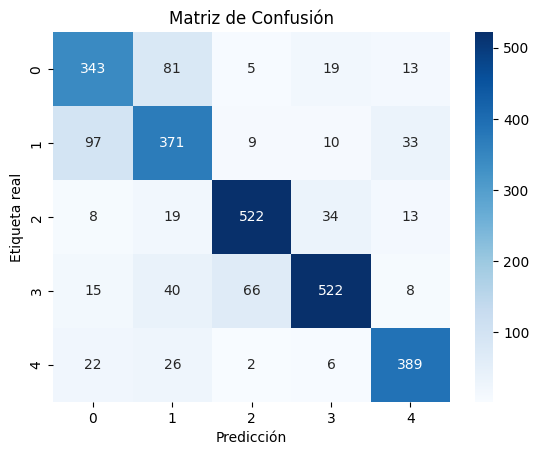

In [17]:
from sklearn.metrics import f1_score, accuracy_score

y_pred = clf.predict(X_test)

print("Reporte de clasificación clf:")
print(classification_report(y_test, y_pred, zero_division=0))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,  # validación cruzada
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
print("Mejores parámetros encontrados:")
print(grid.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  10.4s
[CV] END ma

In [14]:
from sklearn.ensemble import RandomForestClassifier

clfGrid = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

clfGrid.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Reporte de clasificación Grid:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       461
           1       0.90      0.89      0.90       520
           2       0.95      0.96      0.95       596
           3       0.94      0.94      0.94       651
           4       0.94      0.95      0.94       445

    accuracy                           0.93      2673
   macro avg       0.92      0.92      0.92      2673
weighted avg       0.93      0.93      0.93      2673



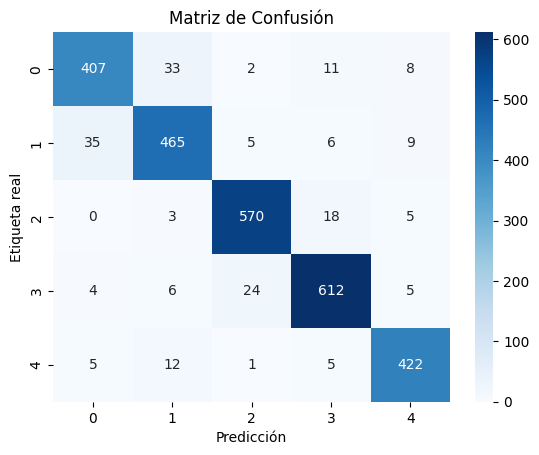

In [16]:
from sklearn.metrics import f1_score, accuracy_score

y_pred = clfGrid.predict(X_test)

print("Reporte de clasificación Grid:")
print(classification_report(y_test, y_pred, zero_division=0))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()


In [23]:
clfGrid.get_metadata_routing

<bound method _MetadataRequester.get_metadata_routing of RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)>

Podemos concluir que el modelo con los hiperparametros ajustados con GridSearchCV tiene un rendimiento superior al modelo inicial, pero con una mejor generalización y robustez.

In [ ]:
joblib.dump(clfGrid, ".src//models/random_forest_model.pkl")
print("💾 Modelo guardado como random_forest_model.pkl")


AttributeError: 'RandomForestClassifier' object has no attribute 'save'